In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
data = pd.read_csv('/content/breast-cancer.csv')


In [ ]:
# Data preprocessing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
# Map 'B' to 0 and 'M' to 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Create an SVM classifier
classifier = SVC(kernel='linear')

In [ ]:
# Cross-validation
cv_scores = cross_val_score(classifier, X_scaled, y, cv=5)
print('Cross-validation scores:', cv_scores)
print('Mean cross-validation score:', cv_scores.mean())

Cross-validation scores: [0.95614035 0.96491228 0.98245614 0.96491228 0.98230088]
Mean cross-validation score: 0.9701443875174661


In [ ]:
# Train the classifier
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


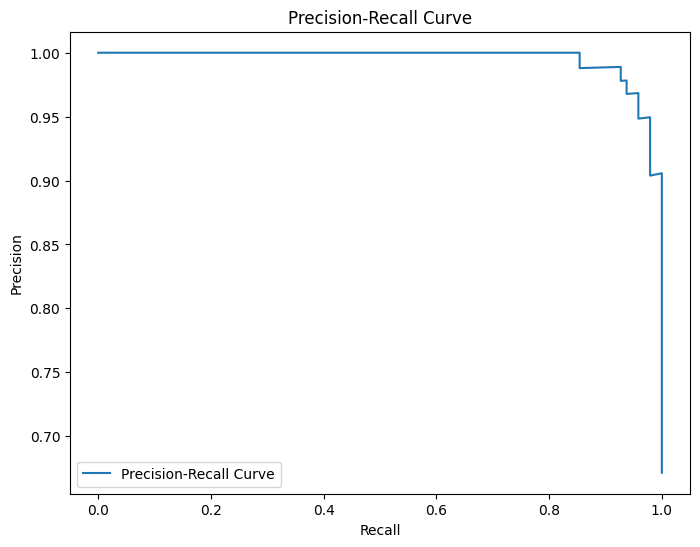

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Calculate the predicted probabilities of the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()



In [ ]:
from sklearn.utils import resample

# Resample y_pred to have the same number of samples as y_test
y_pred_resampled = resample(y_pred,
                               n_samples=len(y_test),
                               random_state=0)

# Generate evaluation metrics
classification_rep = classification_report(y_test, y_pred_resampled)
confusion_mat = confusion_matrix(y_test, y_pred_resampled)
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', confusion_mat)


Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.70      0.46        47
           1       0.70      0.34      0.46        96

    accuracy                           0.46       143
   macro avg       0.52      0.52      0.46       143
weighted avg       0.58      0.46      0.46       143

Confusion Matrix:
 [[33 14]
 [63 33]]


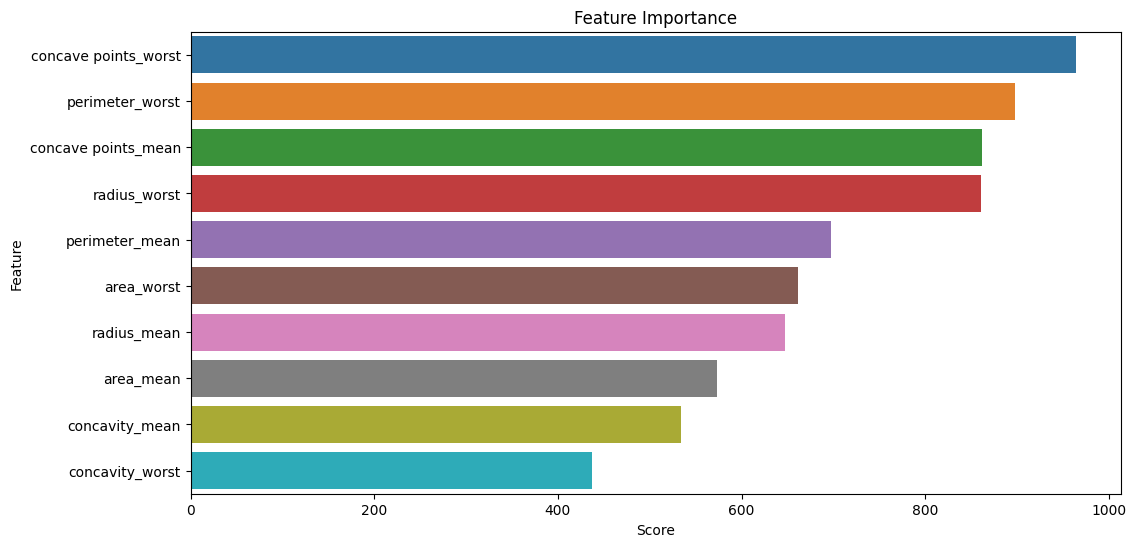

In [ ]:
# Visualize feature importance
feature_names = data.drop('diagnosis', axis=1).columns
feature_scores = selector.scores_
feature_importance = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_importance = feature_importance.nlargest(10, 'Score')

plt.figure(figsize=(12, 6))
sns.barplot(x='Score', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

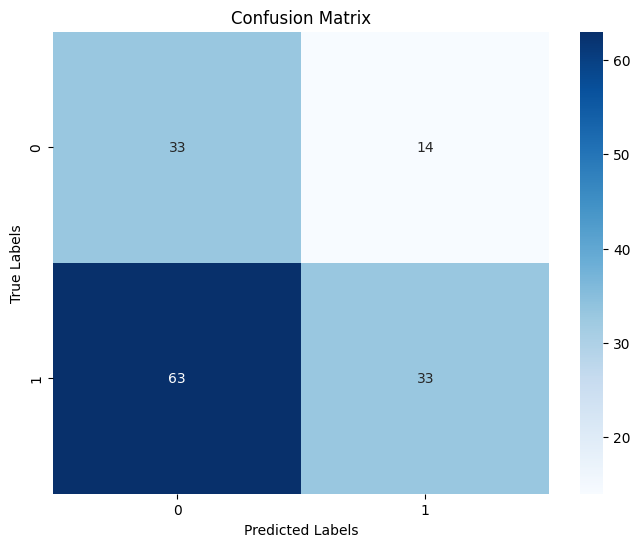

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

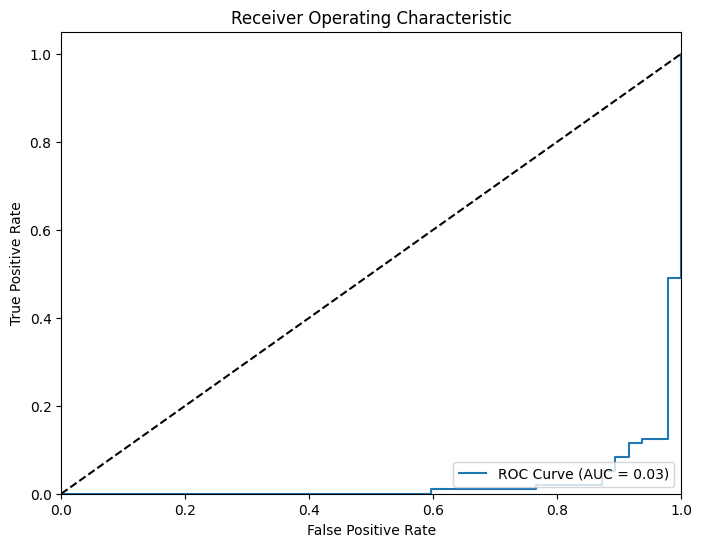

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc

# Reduce the number of features to 20
X_test_reduced = PCA(n_components=20).fit_transform(X_test)

y_scores = classifier.decision_function(X_test_reduced)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
